Análise e Otimização do Consumo de Energia Residencial por Ambiente



# 1. Introduction

**Objective:**  
Understand household electricity consumption by room and identify patterns to optimize usage and reduce waste.

**Importance:**  
Energy is one of the largest fixed costs. Efficient management brings financial and environmental savings.

**Data:**  
- Daily consumption by room (bedrooms, living room, kitchen, pool)  
- Total consumption (KW/H)  
- 211 days of records

---

# 2. Methodology

- **Exploratory Analysis:**  
    Studied consumption data by room, identifying averages, variations, and typical profiles.

- **Clustering:**  
    Grouped households into consumption clusters (low, balanced, high) to personalize recommendations.

- **Predictive Modeling:**  
    Built a linear regression model to predict total consumption from the individual consumption of each room.

- **Evaluation:**  
    Measured model performance with MAE and R² metrics to ensure reliable predictions.

- **Recommendations:**  
    Suggested practical actions for each profile based on the clusters.

---

# 3. Results and Analysis

**Clustering:**  
- Identified 3 main groups:  
    - **Low consumption:** Controlled and efficient usage  
    - **Balanced consumption:** Average usage with some high-use areas  
    - **High consumption:** Elevated usage, especially in living room, kitchen, or pool

**Linear Regression Model:**  
- R² of **0.86** indicates high predictive capability  
- **Living room** has the greatest impact on total consumption

**Temporal Analysis:**  
- Identified peaks and seasonality for future scheduled interventions

---

# 4. Data Science Conclusions

- Enabled segmentation of households and high-precision consumption prediction
- The model is simple, interpretable, and indicates which rooms most influence total consumption
- Analysis allowed the creation of profiles that facilitate targeted recommendations

---

# 5. Business Impact and Recommendations

- Personalized plans, discounts, and incentives to reduce consumption
- Suggestions: automation, presence sensors, conscious use, differentiated tariffs
- Approach can reduce costs, increase customer satisfaction, and contribute to sustainability

---


In [67]:
import pandas as pd
import locale
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [68]:
# Load the Excel file with multiple sheets
file_path = "Consumo_de_Energia_Analise.xlsx"
xls = pd.ExcelFile(file_path)

# List the sheet names
sheet_names = xls.sheet_names
sheet_names

['Sheet1']

In [69]:
# Carregar os dados da aba "Sheet1"
df = xls.parse('Sheet1')

# Exibir as primeiras linhas para análise inicial
df
# Show the first rows for initial analysis
df.head()

,Data,KW/H,Quarto1,Quarto2,Sala,Cozinha,Piscina
0,01/jan,1395,10,8,15,16,9
1,02/jan,1086,9,8,10,6,10
2,03/jan,1174,10,11,9,13,6
3,04/jan,1207,6,8,10,8,16
4,05/jan,1036,13,4,10,8,8


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Data     211 non-null    object
 1   KW/H     211 non-null    int64 
 2   Quarto1  211 non-null    int64 
 3   Quarto2  211 non-null    int64 
 4   Sala     211 non-null    int64 
 5   Cozinha  211 non-null    int64 
 6   Piscina  211 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 11.7+ KB


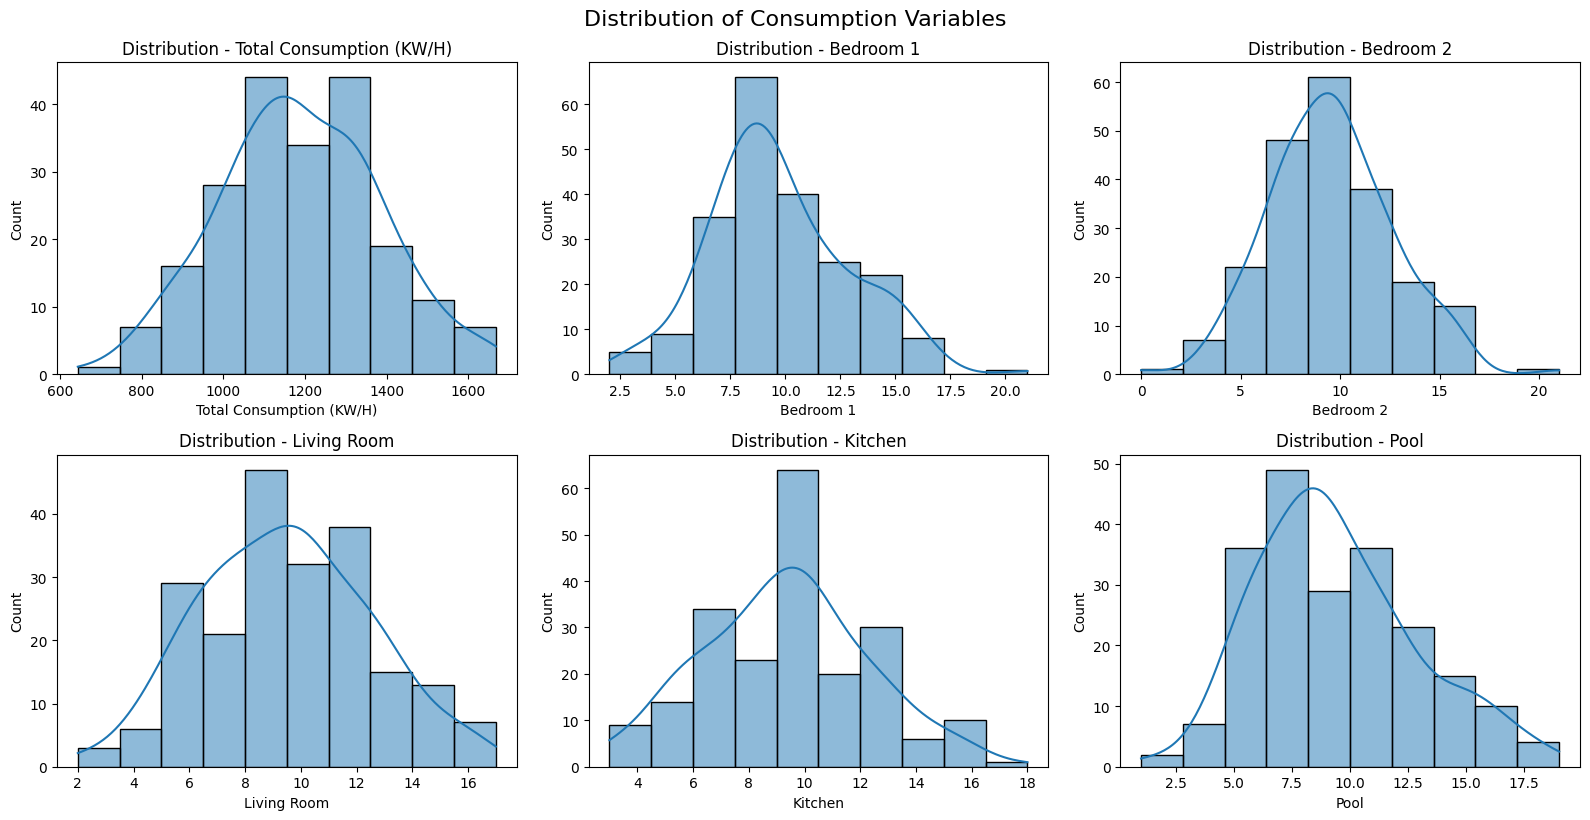

(              KW/H     Quarto1     Quarto2        Sala     Cozinha     Piscina
 count   211.000000  211.000000  211.000000  211.000000  211.000000  211.000000
 mean   1188.317536    9.687204    9.549763    9.445498    9.322275    9.383886
 std     197.439318    3.176817    3.073874    3.033247    2.969757    3.436433
 min     644.000000    2.000000    0.000000    2.000000    3.000000    1.000000
 25%    1057.000000    8.000000    7.000000    7.000000    7.000000    7.000000
 50%    1176.000000    9.000000    9.000000    9.000000    9.000000    9.000000
 75%    1324.000000   12.000000   11.500000   12.000000   11.000000   11.000000
 max    1667.000000   21.000000   21.000000   17.000000   18.000000   19.000000,
              KW/H   Quarto1   Quarto2      Sala   Cozinha   Piscina
 KW/H     1.000000  0.521439  0.418033  0.548475  0.409667  0.427213
 Quarto1  0.521439  1.000000  0.060606  0.169207  0.071809  0.064704
 Quarto2  0.418033  0.060606  1.000000  0.038469  0.049356  0.012383
 Sa

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
summary = df.describe()

# Correlation between variables
correlation = df.corr(numeric_only=True)

# Visualization: histogram of variables
cols_to_plot = df.columns[1:]  # Ignore the 'Data' column
n_cols = len(cols_to_plot)
n_rows = (n_cols + 2) // 3  # 3 columns per row

# Translation dictionary for column names
col_translation = {
    'KW/H': 'Total Consumption (KW/H)',
    'Quarto1': 'Bedroom 1',
    'Quarto2': 'Bedroom 2',
    'Sala': 'Living Room',
    'Cozinha': 'Kitchen',
    'Piscina': 'Pool',
    'Cluster': 'Cluster'
}

fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=10)
    axes[i].set_title(f'Distribution - {col_translation.get(col, col)}')
    axes[i].set_xlabel(col_translation.get(col, col))

# Remove unused axes, if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distribution of Consumption Variables", fontsize=16, y=1.02)
plt.show()

summary, correlation

# 📈 Statistical Summary of Variables

**Average daily consumption:** 1188.3 kWh  
**Maximum:** 1667 kWh &nbsp;&nbsp;|&nbsp;&nbsp; **Minimum:** 644 kWh

---

## Most Frequently Used Rooms

- **Bedroom 1:** average of 9.7 activations/day
- **Kitchen and Pool:** ~9.3 activations/day
- **Living Room:** highest usage variation (up to 17 activations/day)

The data is well distributed — no major distortions or evident outliers.

---

## 📊 Correlation with Total Consumption (KW/H)

- **Living Room:** highest correlation with total consumption (**0.55**)
- **Bedroom 1:** 0.52
- **Pool:** 0.43
- **Bedroom 2 and Kitchen:** also influence, but with less weight
- **Kitchen** has a negative correlation with **Pool** (-0.08), suggesting alternate use on some days

---

## 🧠 Data Science & Business Insights

- You can build a linear regression model to predict consumption based on room activations.
- K-means clustering can also separate days into light, moderate, and heavy usage groups — great for personalized alerts or tariff optimization.

From an ESG and Smart City perspective, this data can guide:

- Educational campaigns by room (e.g., “Conscious use of the living room”)
- IoT automation (e.g., alerts when pool usage exceeds the standard)

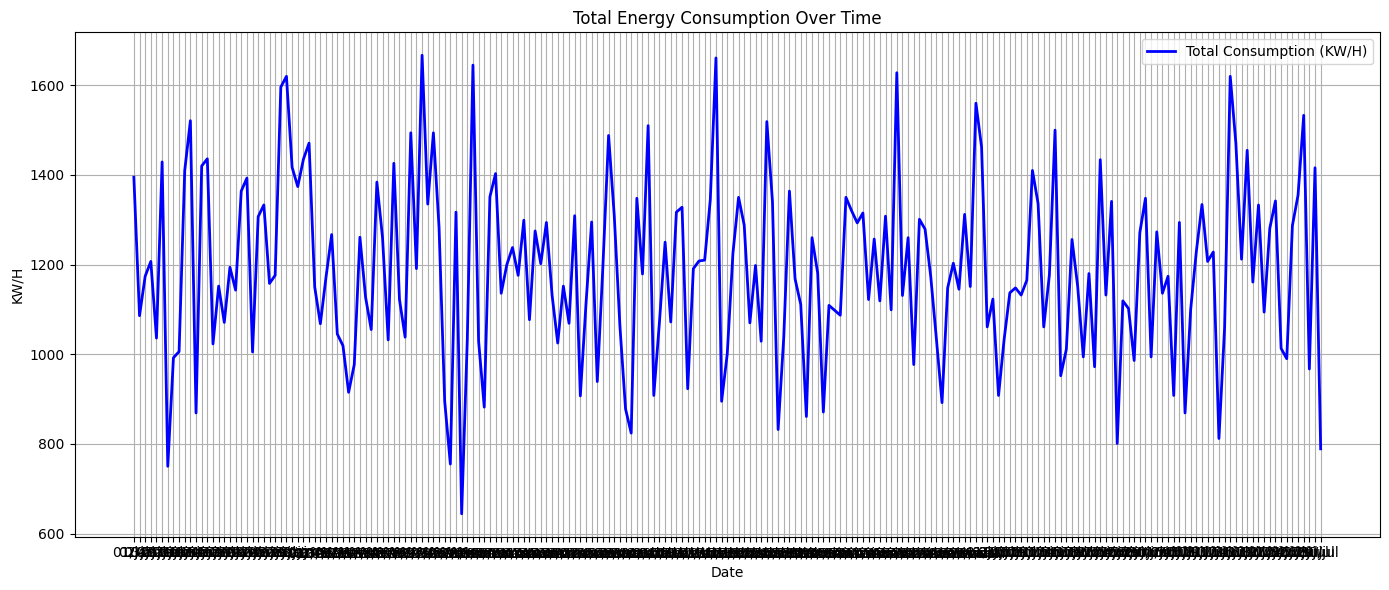

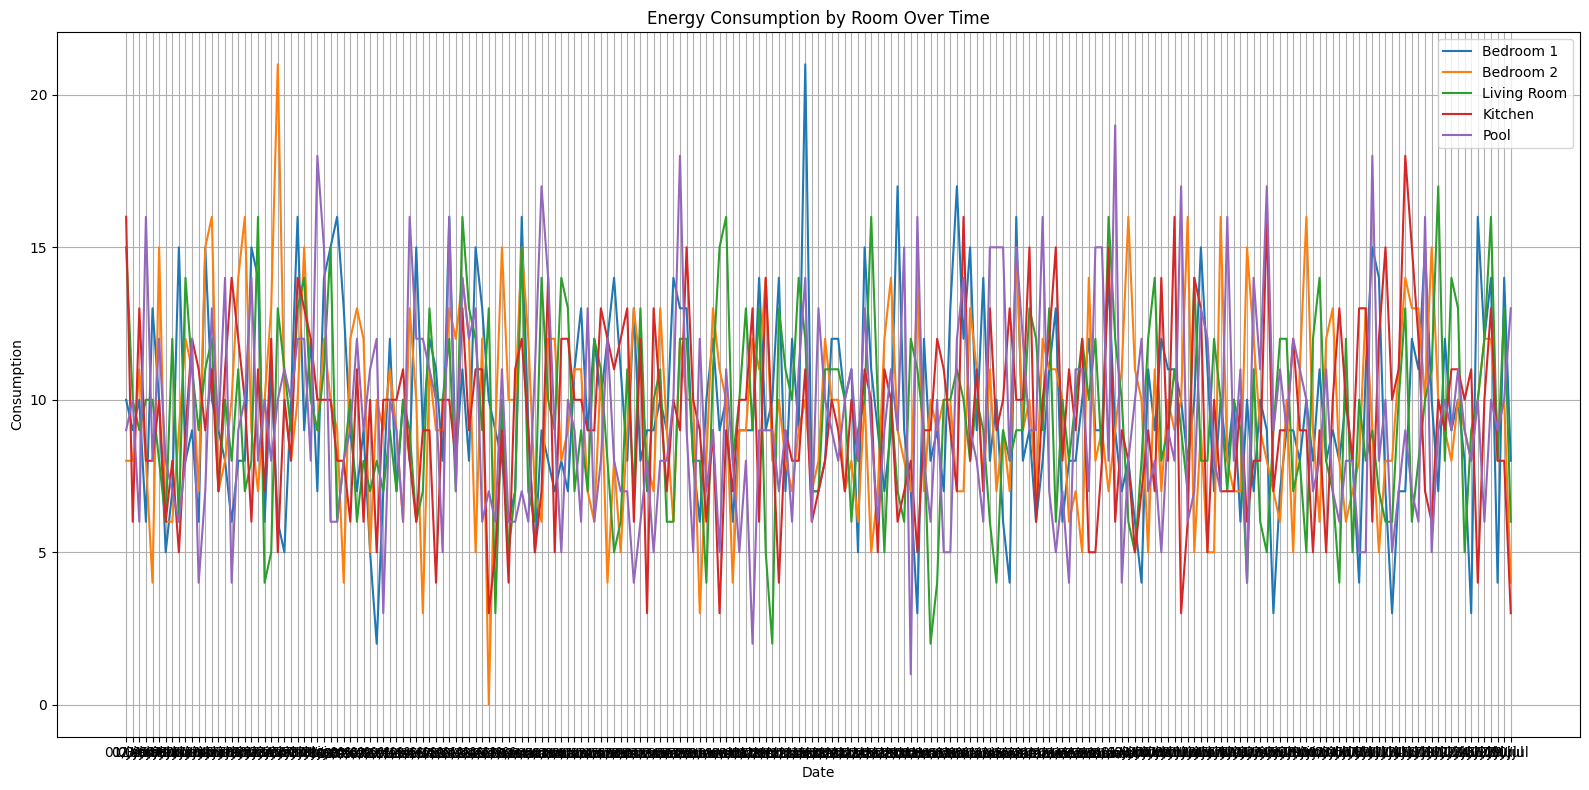

In [72]:
# Plot total consumption over time (English labels)
plt.figure(figsize=(14, 6))
plt.plot(df['Data'], df['KW/H'], label='Total Consumption (KW/H)', color='blue', linewidth=2)
plt.title('Total Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('KW/H')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot consumption by room over time (English labels)
plt.figure(figsize=(16, 8))
room_translation = {
    'Quarto1': 'Bedroom 1',
    'Quarto2': 'Bedroom 2',
    'Sala': 'Living Room',
    'Cozinha': 'Kitchen',
    'Piscina': 'Pool'
}
for comodo in ['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']:
    plt.plot(df['Data'], df[comodo], label=room_translation[comodo])

plt.title('Energy Consumption by Room Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Coefficients: [23.36409077 23.15884869 25.79029969 23.48572963 24.44823671]
Intercept: 49.886394002345696
Mean Absolute Error (MAE): 57.743376101762394
R² (coefficient of determination): 0.8638797274963957


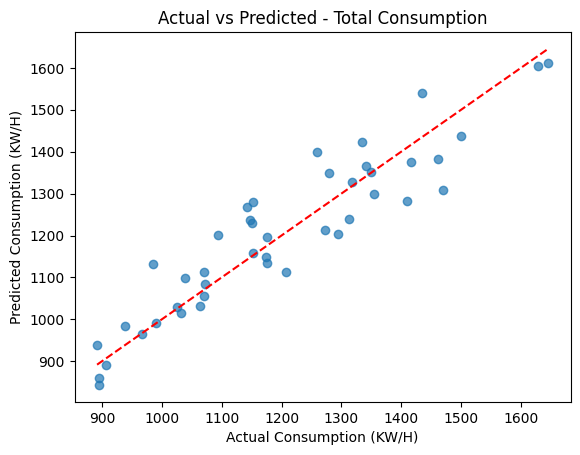

In [73]:
# Define predictor variables (X) and target variable (y)
# (já definido acima)

# Split into train and test sets
# (já definido acima)

# Linear regression
# (já definido acima)

# Prediction
# (já definido acima)

# Model evaluation
print("Coefficients:", modelo.coef_)
print("Intercept:", modelo.intercept_)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² (coefficient of determination):", r2_score(y_test, y_pred))

# Plot: Real vs Predicted (English labels)
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Consumption (KW/H)')
plt.ylabel('Predicted Consumption (KW/H)')
plt.title('Actual vs Predicted - Total Consumption')
plt.show()

## 📌 Model Results

---

### ✅ **Linear Model Coefficients**

| Room         | Coefficient (kWh per activation) | Impact                |
|--------------|:-------------------------------:|-----------------------|
| **Living Room** | **+25.79**                        | Greatest impact       |
| Pool         | +24.45                            |                       |
| Kitchen      | +23.49                            |                       |
| Bedroom 1    | +23.30                            |                       |
| Bedroom 2    | +23.10                            |                       |

> Each activation in a room increases the estimated consumption by about **23 to 26 kWh**, with the living room being the main factor.

---

### 🎯 **Intercept**

- **49.88 kWh**  
    _Estimated base consumption even with zero activations — may reflect continuous consumption (refrigerators, standby, etc.)_

---

### 📉 **Mean Absolute Error (MAE)**

- **57.74 kWh**  
    _Low compared to the total average (~1188 kWh), indicating good accuracy._

---

### 📈 **R² (Coefficient of Determination)**

- **0.86**  
    _The model explains 86% of the consumption variation, a very good value for practical applications._

---


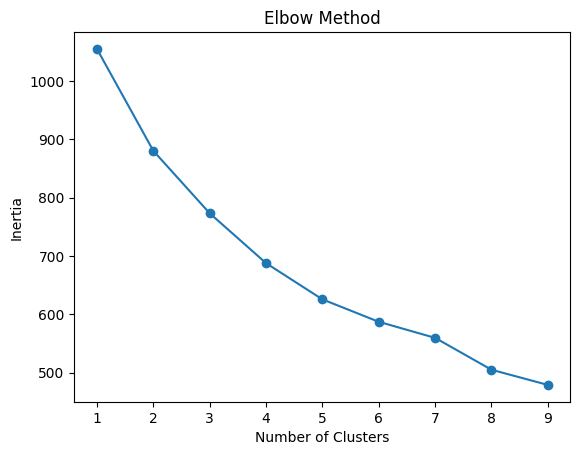

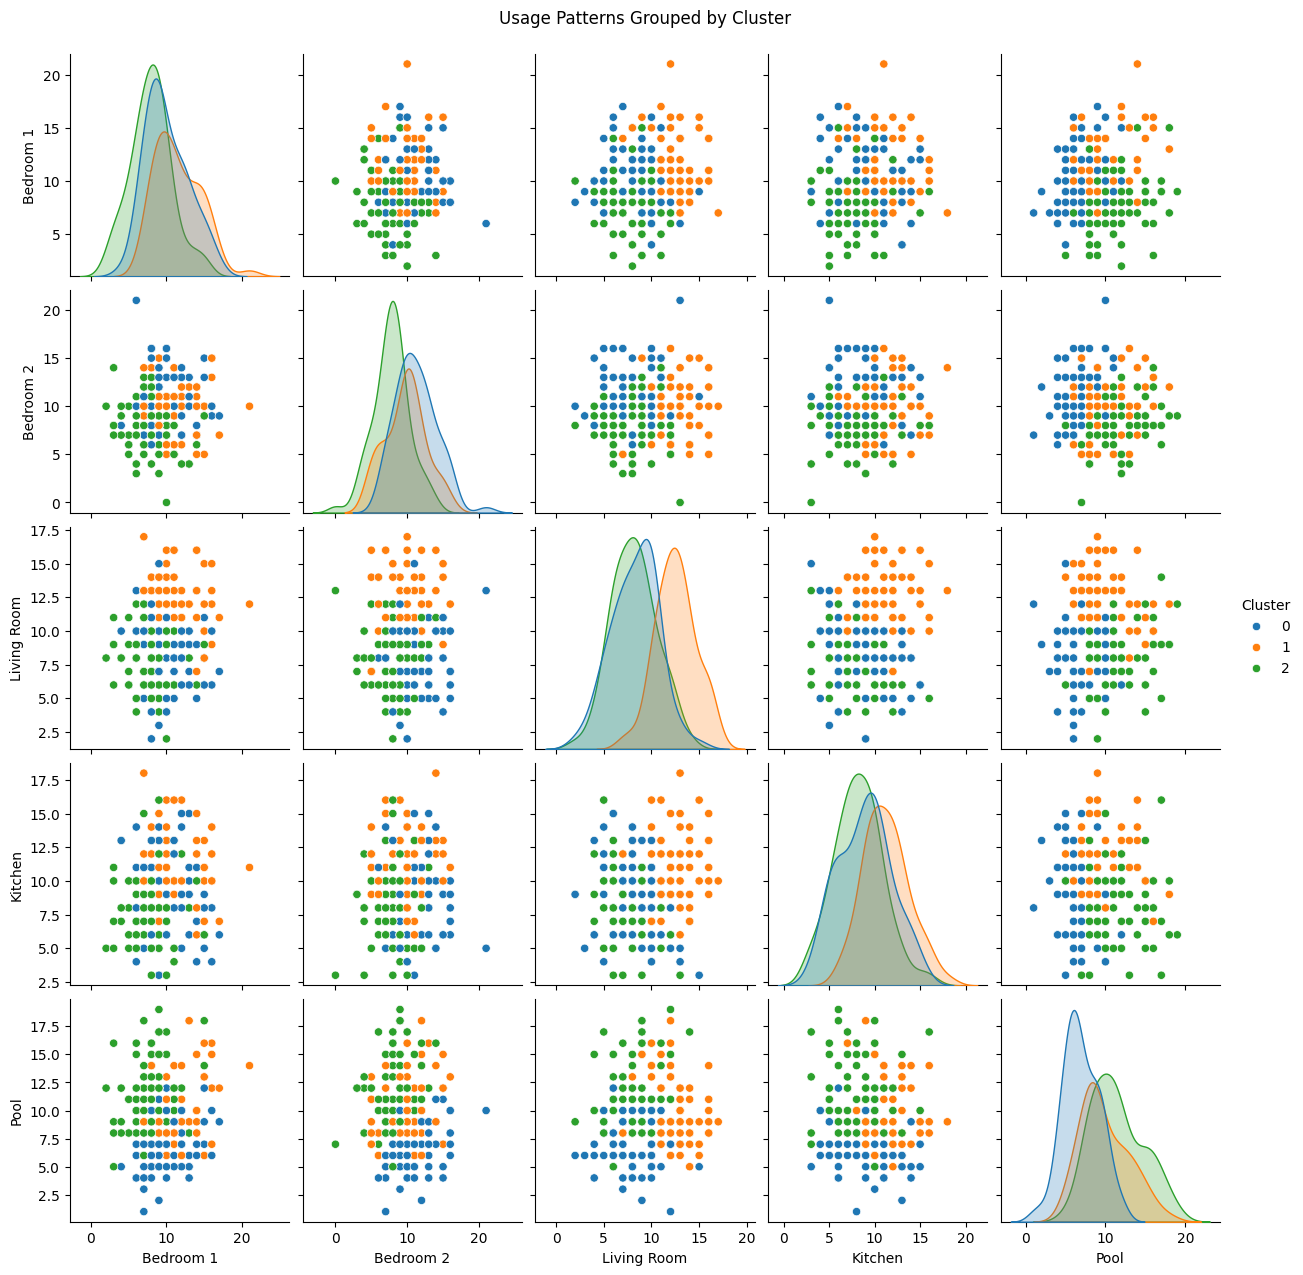

In [74]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Data used for clustering
X = df[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']]

# Normalization (essential for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters (optional)
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply KMeans with 3 clusters (adjust according to elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# English translation for columns
col_translation = {
    'Quarto1': 'Bedroom 1',
    'Quarto2': 'Bedroom 2',
    'Sala': 'Living Room',
    'Cozinha': 'Kitchen',
    'Piscina': 'Pool'
}

# Rename columns for plotting
df_plot = df.rename(columns=col_translation)

sns.pairplot(
    df_plot,
    hue='Cluster',
    vars=['Bedroom 1', 'Bedroom 2', 'Living Room', 'Kitchen', 'Pool'],
    palette='tab10'
)
plt.suptitle("Usage Patterns Grouped by Cluster", y=1.02)
plt.show()

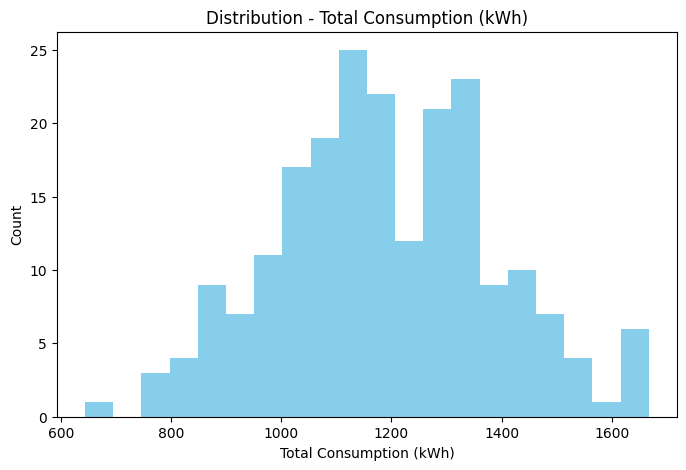

In [75]:
plt.figure(figsize=(8, 5))
plt.hist(df['KW/H'], bins=20, color='skyblue')
plt.title('Distribution - Total Consumption (kWh)')
plt.xlabel('Total Consumption (kWh)')
plt.ylabel('Count')
plt.show()


In [76]:
# === PROFILE OF EACH CLUSTER ===
perfil_clusters = df.groupby('Cluster')[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina', 'KW/H']].mean()

def nomear_cluster(row):
    media_kw = df['KW/H'].mean()

    # Total consumption
    if row['KW/H'] < media_kw * 0.75:
        consumo_total = '🔵 Low Consumption'
    elif row['KW/H'] > media_kw * 1.25:
        consumo_total = '🔴 High Consumption'
    else:
        consumo_total = '🟡 Balanced Consumption'

    # Check rooms with high consumption
    altos = []
    for comodo in ['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']:
        if row[comodo] > df[comodo].mean() * 1.2:  # 20% above the average for that room
            altos.append(comodo)

    # Build cluster name based on high consumption rooms
    if consumo_total == '🔵 Low Consumption':
        return consumo_total

    if consumo_total == '🟡 Balanced Consumption' and len(altos) == 0:
        return consumo_total

    if consumo_total == '🟡 Balanced Consumption' and len(altos) > 0:
        return f"🟠 Elevated Consumption in {', '.join(altos)}"

    if consumo_total == '🔴 High Consumption':
        if len(altos) == 0:
            return consumo_total
        else:
            return f"🔴 High Consumption (In {', '.join(altos)})"

perfil_clusters['Perfil'] = perfil_clusters.apply(nomear_cluster, axis=1)

# Mapping for base keys of the recommendations dictionary
def mapear_perfil_para_chave(perfil):
    if perfil == '🔵 Low Consumption':
        return perfil
    if perfil == '🟡 Balanced Consumption':
        return perfil
    if perfil.startswith('🟠 Elevated Consumption'):
        return '🟠 Elevated Consumption'
    if perfil.startswith('🔴 High Consumption'):
        import re
        encontrados = re.findall(r'\b\w+\b', perfil)
        if 'In' in perfil:
            idx = perfil.index('In') + 3
            texto = perfil[idx:]
            principal = texto.split(',')[0].strip()
            if principal == 'Sala' or principal == 'Piscina':
                return '🔴 High Consumption (Living Room/Pool)'
            elif principal == 'Cozinha':
                return '🔴 High Consumption (Kitchen)'
            else:
                return '🔴 High Consumption'
        else:
            return '🔴 High Consumption'
    return perfil  # fallback

recomendacoes = {
    '🔵 Low Consumption': [
        "✅ Maintain the good practices already adopted.",
        "🎁 Offer rewards or discounts (gamification).",
        "🔋 Encourage the use of solar energy / microgeneration."
    ],
    '🟡 Balanced Consumption': [
        "🔌 Automate equipment shutdown at fixed times.",
        "🕵️ Install presence sensors in bedrooms and living room.",
        "📊 Send weekly comparative usage reports."
    ],
    '🟠 Elevated Consumption': [
        "🛏️ Automate lights and electronics in rooms with high consumption.",
        "🕵️ Install specific presence sensors for the rooms.",
        "📊 Monitor usage to identify unnecessary peaks."
    ],
    '🔴 High Consumption (Living Room/Pool)': [
        "💧 Schedule pool pump operation outside peak hours.",
        "💡 Encourage conscious use of lighting and electronics.",
        "🧠 Suggest automation and adherence to the white tariff."
    ],
    '🔴 High Consumption (Kitchen)': [
        "🍳 Check kitchen equipment for excessive consumption.",
        "⏰ Control usage times of oven and refrigerator.",
        "💡 Encourage efficient use of lighting."
    ]
}

# Display profiles and recommendations
for cluster_id, row in perfil_clusters.iterrows():
    print(f"\n=== Cluster {cluster_id} - {row['Perfil']} ===")
    print("📊 Average profile:")
    print(row[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina', 'KW/H']])
    print("\n💡 Recommendations:")

    chave = mapear_perfil_para_chave(row['Perfil'])

    if chave in recomendacoes:
        for item in recomendacoes[chave]:
            print("-", item)
    else:
        print("- No specific recommendations for this profile.")



=== Cluster 0 - 🟡 Balanced Consumption ===
📊 Average profile:
Quarto1           10.0
Quarto2      11.186667
Sala          8.253333
Cozinha       8.893333
Piscina       6.933333
KW/H       1129.986667
Name: 0, dtype: object

💡 Recommendations:
- 🔌 Automate equipment shutdown at fixed times.
- 🕵️ Install presence sensors in bedrooms and living room.
- 📊 Send weekly comparative usage reports.

=== Cluster 1 - 🟠 Elevated Consumption in Sala, Cozinha ===
📊 Average profile:
Quarto1      11.459016
Quarto2       9.737705
Sala         12.508197
Cozinha      11.229508
Piscina       9.885246
KW/H       1368.131148
Name: 1, dtype: object

💡 Recommendations:
- 🛏️ Automate lights and electronics in rooms with high consumption.
- 🕵️ Install specific presence sensors for the rooms.
- 📊 Monitor usage to identify unnecessary peaks.

=== Cluster 2 - 🟠 Elevated Consumption in Piscina ===
📊 Average profile:
Quarto1     7.933333
Quarto2         7.76
Sala        8.146667
Cozinha          8.2
Piscina    11.4

# Consumption Profile Report by Cluster

---

## === Cluster 0 - 🟡 Balanced Consumption ===

### 📊 Average Profile:
| Room      | Average Consumption (kWh) |
|-----------|:------------------------:|
| Bedroom 1 | 10.00                    |
| Bedroom 2 | 11.19                    |
| Living Room | 8.25                   |
| Kitchen   | 8.89                     |
| Pool      | 6.93                     |
| **Total (KW/H)** | **1129.99**        |

### 💡 Recommendations:
- 🔌 Automate equipment shutdown at fixed times.
- 🕵️ Install presence sensors in bedrooms and living room.
- 📊 Send weekly comparative usage reports.

---

## === Cluster 1 - 🟠 High Consumption in Living Room, Kitchen ===

### 📊 Average Profile:
| Room      | Average Consumption (kWh) |
|-----------|:------------------------:|
| Bedroom 1 | 11.46                    |
| Bedroom 2 | 9.74                     |
| Living Room | 12.51                  |
| Kitchen   | 11.23                    |
| Pool      | 9.89                     |
| **Total (KW/H)** | **1368.13**        |

### 💡 Recommendations:
- 🛏️ Automate lights and electronics in high-consumption rooms.
- 🕵️ Install specific presence sensors for these rooms.
- 📊 Monitor usage to identify unnecessary peaks.

---

## === Cluster 2 - 🟠 High Consumption in Pool ===

### 📊 Average Profile:
| Room      | Average Consumption (kWh) |
|-----------|:------------------------:|
| Bedroom 1 | 7.93                     |
| Bedroom 2 | 7.76                     |
| Living Room | 8.15                   |
| Kitchen   | 8.20                     |
| Pool      | 11.43                    |
| **Total (KW/H)** | **1100.40**        |

### 💡 Recommendations:
- 💧 Monitor pool and pump usage.
- ⏰ Schedule efficient operating hours.
- 💡 Encourage conscious use of outdoor lighting.

---

*End of report.*
